# Default state of the Python script and needed functions

*It is important to run these code snippets before other*

In [ ]:
# For basic calculations
import numpy as np
from numpy.linalg import eig  # Eigenvalues

# For checking the values obtained during transformation SS -> TF
from scipy.signal import ss2tf

# For integration
from scipy.integrate import odeint

In [ ]:
# x_dot from state space with constant U
def dxdt(x, t, A, B, u):
  return A.dot(x) + B.dot(u)

In [ ]:
# For plotting exactly one plot
from matplotlib.pyplot import *

def plot1(t, sol, title_str=''):
  subplot(121)
  plot(t, sol)
  if title_str:
    title(title_str)
  grid(True)
  xlabel('Time $t$')
  ylabel('State $x(t)$')
  show()

# From linear ODE to State Space

Given an ODE:

$$a_{k}y^{(k)} +a_{k-1}y^{(k-1)}+...+a_{2}\ddot y+a_{1}\dot y + a_0 y= b_0$$

find its state space representation:

$$\dot x = Ax + b$$

## Process

The first step is to express higher derivatives

Step 1.1:

$$y^{(k)} + 
\frac{a_{k-1}}{a_{k}}y^{(k-1)}+
...+
\frac{a_{2}}{a_{k}}\ddot y+
\frac{a_{1}}{a_{k}}\dot y + 
\frac{a_{0}}{a_{k}} y = 
\frac{b_0}{a_{k}}$$

Step 1.2:

$$y^{(k)} = 
-\frac{a_{k-1}}{a_{k}}y^{(k-1)}-
...-
\frac{a_{2}}{a_{k}}\ddot y -
\frac{a_{1}}{a_{k}}\dot y - 
\frac{a_{0}}{a_{k}} y + 
\frac{b_0}{a_{k}}$$

Second step s introduction of new variables $x$:

Step 2.1:

$$x_k = y^{(k-1)} \\
  x_{k-1} = y^{(k-2)} \\
  ... \\
  x_1 = y$$

Step 2.2:
$$\dot x_1 = x_2 \\
\dot x_2 = x_3 \\
... \\
\dot x_k = 
-\frac{a_{k-1}}{a_{k}}x_k-
...-
\frac{a_{2}}{a_{k}} x_3 -
\frac{a_{1}}{a_{k}} x_2 - 
\frac{a_{0}}{a_{k}} x_1 + 
\frac{b_0}{a_{k}}$$

Finally, we write it in a matrix form.

# Tasks 1.1: ODE to State Space conversion

Convert to State Space represantation and to a transfer function representation

* $10 y^{(4)} -7  y^{(3)} + 2   \ddot y + 0.5 \dot y + 4y  = 15 u$

**Solution:**
1. Expressing higher derivative ($4^{th}$),
$$\ddddot y = 0.7 \dddot y - 0.2 \ddot y - 0.05 \dot y - 0.4y  + 1.5 u$$
2. Introducing new variables $x$,
$$
  x_4 = \dddot y \\
  x_3 = \ddot y \\
  x_2 = \dot y \\
  x_1 = y
$$
3. Diffirentiating the $x$ yields
$$
  \dot x_1 = x_2 \\
  \dot x_2 = x_3 \\
  \dot x_3 = x_4 \\
  \dot x_4 = 0.7 x_4 - 0.2 x_3 - 0.05 x_2 - 0.4 x_1 + 1.5 u
$$
4. Converting to the matrix form, we obtain *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                -0.4 & -0.05 & -0.2 & 0.7
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1.5
\end{pmatrix} u
$$
5. Applying Laplace transform to the given equation with initial values $\dddot y(0) = 0, \ \ddot y(0) = 0, \ \dot y(0) = 0, \ y(0) = 0$, we obtain *Transfer Function repersentation,*
$$y = \frac{15}{10s^4 - 7s^3 + 2s^2 + 0.5s + 4}u, \ W(s) = \frac{15}{10s^4 - 7s^3 + 2s^2 + 0.5s + 4}$$

* $5  y^{(4)} - 17 y^{(3)} - 3 \ddot y + 1.5 \dot y + 2y  = 25 u$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                -0.4 & -0.3 & 0.6 & 3.4
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 5
\end{pmatrix} u
$$
 *Transfer Function repersentation,*
$$y = \frac{25}{5s^4 - 17s^3 - 3s^2 + 1.5s + 2}u, \ W(s) = \frac{25}{5s^4 - 17s^3 - 3s^2 + 1.5s + 2}$$

* $-3 y^{(4)} +22 y^{(3)} + 4   \ddot y + 1.5 \dot y + 1y  = 15 u$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                \frac{1}{3} & 0.5 & \frac{4}{3} & \frac{22}{3}
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ -5
\end{pmatrix} u
$$
 *Transfer Function repersentation,*
$$y = \frac{15}{-3s^4 + 22s^3 + 4s^2 + 1.5s + 1}u, \ W(s) = \frac{15}{-3s^4 + 22s^3 + 4s^2 + 1.5s + 1}$$

* $5  y^{(4)} -17 y^{(3)} - 1.5 \ddot y + 100 \dot y + 1.1y= 45 u$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                -0.22 & -20 & 0.3 & 3.4 
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 9
\end{pmatrix} u
$$
 *Transfer Function repersentation,*
$$y = \frac{45}{5s^4 - 17s^3 - 1.5s^2 + 100s + 1.1}u, \ W(s) = \frac{45}{5s^4 - 17s^3 - 1.5s^2 + 100s + 1.1}$$

* $1.5y^{(4)} -23 y^{(3)} - 2.5 \ddot y + 0.1 \dot y + 100y= -10 u$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                -\frac{200}{3} & -\frac{1}{15} & \frac{5}{3} & \frac{46}{3}
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ -\frac{20}{3}
\end{pmatrix} u
$$
 *Transfer Function repersentation,*
$$y = \frac{10}{-1.5s^4 + 23s^3 + 2.5s^2 - 0.1s - 100}u, \ W(s) = \frac{10}{-1.5s^4 + 23s^3 + 2.5s^2 - 0.1s - 100}$$

# Task 1.2 (higher difficulty)

Convert the following to a second order ODE and to a transfer function representation:

*Remark: I used [pseudoinverse](https://comnuan.com/cmnn0100f/cmnn0100f.php) and [matrix](https://matrixcalc.org/) calculator for this task. Transfer function were checked with the help of [Wolfram alpha widget](https://www.wolframalpha.com/widgets/view.jsp?id=5fe0721dc704c39230c5c5a2e6a2f166).*

$$\dot x = 
\begin{pmatrix} 1 & 0 \\ -5 & -10
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$

**Solution:**

1. Let $A = \begin{pmatrix} 1 & 0 \\ -5 & -10 \end{pmatrix},\ B = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$. Applying derivative operator (Laplace transfrom) to the given system in State Space form yields
$$
sIx - Ax = Bu
$$
$$
\begin{pmatrix} s & 0 \\ 0 & s \end{pmatrix}x - \begin{pmatrix} 1 & 0 \\ -5 & -10 \end{pmatrix}x = \begin{pmatrix} 0 \\ 1 \end{pmatrix}u
$$
2. Next, expressing $x$ and substituting into $y = \begin{pmatrix} 1 & 0 \end{pmatrix} x$,
$$
y = \begin{pmatrix} 1 & 0 \end{pmatrix}\begin{pmatrix} s - 1 & 0 \\ 5 & s + 10 \end{pmatrix}^{-1}\begin{pmatrix} 0 \\ 1 \end{pmatrix}u
$$
3. Therefore, we obtain *Transfer Function representation* by matrix multiplication and taking inverse of the corresponding matrix,
$$
y = \frac{0}{s^2 +9s - 10}u,\ W(s) = 0
$$ *Remark: System is not controllable*
4. We know that $Y(s) = W(s) U(s)$, then by applying inverse Laplace transform, *ODE form* is the following:
$$ \ddot y +9\dot y -10y = 0$$

*Another way to approach the ODE form:*
1. We also know that for some $w = \begin{pmatrix} w_1 \\ w_2 \end{pmatrix}$ and $T = \begin{pmatrix} w_1 & w_2 \\ a_{11}w_1 + a_{21}w_2 & a_{12}w_1 + a_{22}w_2 \end{pmatrix}$,
$$
\ddot y = w^T A A T^+ \begin{pmatrix} y \\ \dot y \end{pmatrix}\\
$$
2. Substituting the values given yields
$$
\ddot y = \begin{pmatrix} w_1 & w_2 \end{pmatrix}\begin{pmatrix} 1 & 0 \\ -5 & -10 \end{pmatrix}\begin{pmatrix} 1 & 0 \\ -5 & -10 \end{pmatrix}\begin{pmatrix} w_1 & w_2 \\ w_1 & -5w_1 - 10w_2 \end{pmatrix}^+\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
3. Let, for example, $w = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$. Then we obtain *second order ODE* by matrix multiplication and taking pseudoinverse of the matrix $T$ with inserted values
$$
\ddot y = \begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} 1 & 0 \\ 45 & -100 \end{pmatrix}\begin{pmatrix} 1 & 1\\ 1 & -25 \end{pmatrix}^+\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y = \begin{pmatrix} 40.379 & 5.621 \end{pmatrix}\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y - 5.621\dot y -40.379y = 0
$$

$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 1 & 3
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$

**Solution:**

*Transfer Function representation,*
$$
y = \frac{8}{s^2 -3s -8}u,\ W(s) = \frac{8}{s^2 -3s -8}
$$

*ODE form,*
$$ \ddot y -3\dot y -8y = 8u$$

*ODE form (another approach with $w = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$,*
$$
\ddot y = \begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} 8 & 24 \\ 3 & 17 \end{pmatrix}\begin{pmatrix} 1 & 1\\ 8 & 4 \end{pmatrix}^+\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y = \begin{pmatrix} 71 & -7.5 \end{pmatrix}\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y +7.5\dot y -71y = 0
$$

$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 6 & 0
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$

**Solution:**

*Transfer Function representation,*
$$
y = \frac{8}{s^2 -48}u,\ W(s) = \frac{8}{s^2 -48}
$$

*ODE form,*
$$ \ddot y -48y = 8u$$

*ODE form (another approach with $w = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$,*
$$
\ddot y = \begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} 48 & 0 \\ 0 & 48 \end{pmatrix}\begin{pmatrix} 1 & 1\\ 8 & 6 \end{pmatrix}^+\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y = \begin{pmatrix} 48 & 0 \end{pmatrix}\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y -48y = 0
$$


$$\dot x = 
\begin{pmatrix} 0 & 1 \\ 6 & 3
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 1
\end{pmatrix} u
$$

**Solution**

*Transfer Function representation,*
$$
y = \frac{1}{s^2 -3s -6}u,\ W(s) = \frac{1}{s^2 -3s -6}
$$

*ODE form,*
$$
\ddot y -3\dot y -6y = u
$$

*ODE form (another approach with $w = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$,*
$$
\ddot y = \begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} 6 & 3 \\ 18 & 15 \end{pmatrix}\begin{pmatrix} 1 & 1\\ 1 & 9 \end{pmatrix}^+\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y = \begin{pmatrix} 24.75 & -0.75 \end{pmatrix}\begin{pmatrix} y \\ \dot y \end{pmatrix}
$$
$$
\ddot y +0.75\dot y -24.75y = 0
$$

---

For all of the above, $$y = \begin{pmatrix} 1 & 0 \end{pmatrix} x$$ 

# Solve ODE

Below is an example of how one can solve and ODE in Python

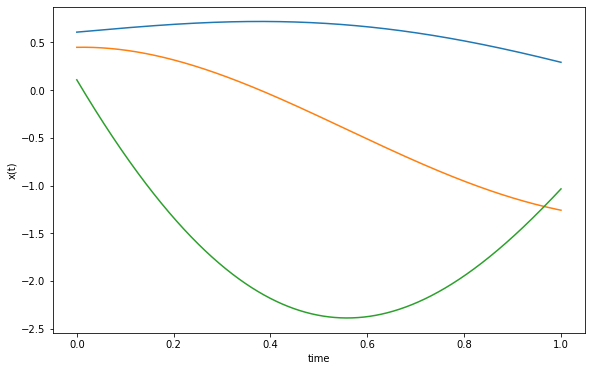

In [ ]:
import numpy as np
from scipy.integrate import odeint

n = 4
A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-10, -5, -2]])

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)# + B*np.sin(t)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n-1)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}

import matplotlib.pyplot as plt

plt.subplot(121)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

## Task 1.3 Implement Euler Integration or Runge-Kutta Integration scheme, solve the equation from the Task 1 using it.

Solution to the equation (Task 1.1, equation #2):
$$5  y^{(4)} - 17 y^{(3)} - 3 \ddot y + 1.5 \dot y + 2y  = 25 u$$

Space State representation:
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                -0.4 & -0.3 & 0.6 & 3.4
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 5
\end{pmatrix} u
$$

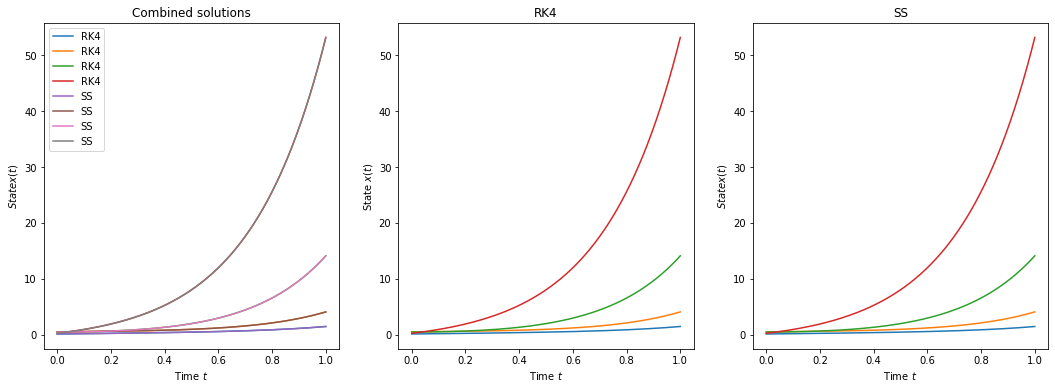

In [ ]:
# x_dot from state space
def StateSpace(x, t):
    return A.dot(x) + B

# Runge-Kutta 4th order method
def RungeKutta4(f, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(x[i], t[i])
        k2 = f(x[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(x[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(x[i] + k3 * h, t[i] + h)
        x[i + 1] = x[i] + (h / 6.) * (k1 + 2 * k2 + 2 * k3 + k4)
    return x

# Constants
A = np.array([[0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1],
              [-0.4, -0.3, 0.6, 3.4]])
B = np.array([0,
              0,
              0,
              5])
n = len(B)

# Time domain
time = np.linspace(0, 1, 1000)

# Initial state
x0 = np.random.rand(n)

solution = {"RK4": RungeKutta4(StateSpace, x0, time),
            "SS": odeint(StateSpace, x0, time)}

# Simulation
import matplotlib.pyplot as plt

fig, (ax, ax1, ax2) = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = 18, 6
ax.plot(time, solution["RK4"], label='RK4')
ax.plot(time, solution["SS"], label='SS')
ax.set_title('Combined solutions')
ax.set(xlabel='Time $t$', ylabel='$State x(t)$')
ax.legend()
ax1.plot(time, solution["RK4"])
ax1.set_title('RK4')
ax1.set(xlabel='Time $t$', ylabel='State $x(t)$')
ax2.plot(time, solution["SS"])
ax2.set_title('SS')
ax2.set(xlabel='Time $t$', ylabel='$State x(t)$')

plt.show()

# Task 2.1, convert to state space and simulate

* $10 y^{(5)} + 10 y^{(4)} -7  y^{(3)} + 2   \ddot y + 0.5 \dot y + 4y  = 0$

**Solution:**
1. Expressing higher derivative ($5^{th}$),
$$ y^{(5)} = - \ddddot y + 0.7 \dddot y - 0.2 \ddot y - 0.05 \dot y -0.4 y$$
2. Introducing new variables $x$,
$$
  x_5 = \ddddot y,\
  x_4 = \dddot y,\
  x_3 = \ddot y,\
  x_2 = \dot y,\
  x_1 = y
$$
3. Diffirentiating the $x$ yields
$$
  \dot x_1 = x_2,\
  \dot x_2 = x_3,\
  \dot x_3 = x_4,\
  \dot x_4 = x_5\\
  \dot x_5 = -x_5 + 0.7x_4 - 0.2x_3 - 0.05x_2 - 0.4x_1
$$
4. Converting to the matrix form, we obtain *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -0.4 & -0.05 & -0.2 & 0.7 & -1
\end{pmatrix} x
$$

* $1 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 3   \ddot y + 1.5 \dot y + 2y  = 0$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -2 & -1.5 & 3 & 17 & -5
\end{pmatrix} x
$$

* $6 y^{(5)} -3 y^{(4)}  +22 y^{(3)} + 4   \ddot y + 1.5 \dot y + 1y  = 0$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -\frac{1}{6} & -0.25 & -\frac{2}{3} & -\frac{11}{3} & 0.5
\end{pmatrix} x
$$

* $22 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 1.5 \ddot y + 100 \dot y + 1.1y= 0$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -0.05 & -\frac{50}{11} & \frac{3}{44} & \frac{17}{22} & -\frac{5}{22}
\end{pmatrix} x
$$

* $-10 y^{(5)} + 1.5y^{(4)} -23 y^{(3)} - 2.5 \ddot y + 0.1 \dot y + 100y= 0$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                10 & 0.01 & -0.25 & -2.3 & 0.15
\end{pmatrix} x
$$


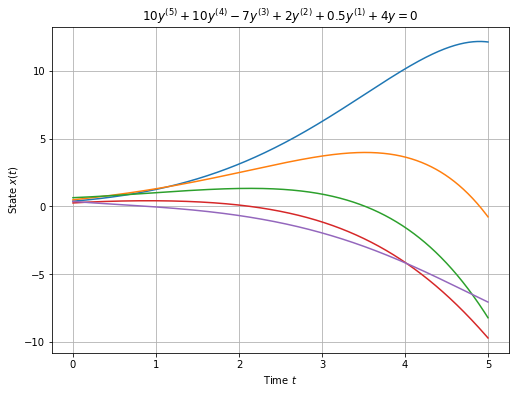

In [ ]:
# Simulation of the 1st equation (Task 2.1)

# Constants
A = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [-0.4, -0.05, -0.2, 0.7, -1]])
B = np.array([0,
              0,
              0,
              0,
              0])
u = 0
n = len(A)

# Time domain
time = np.linspace(0, 5, 1000)

# Initial state
x0 = np.random.rand(n)

solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution, 
      title_str='$10 y^{(5)}+10 y^{(4)}-7y^{(3)}+2 y^{(2)}+0.5 y^{(1)}+4y=0$')

# Task 2.2, convert to state space and simulate


* $10 y^{(5)} + 10 y^{(4)} -7  y^{(3)} + 2   \ddot y + 0.5 \dot y + 4y  = \sin(t)$

**Solution:**
1. Expressing higher derivative ($5^{th}$),
$$ y^{(5)} = - \ddddot y + 0.7 \dddot y - 0.2 \ddot y - 0.05 \dot y -0.4 y + 0.1\sin(t)$$
2. Introducing new variables $x$,
$$
  x_5 = \ddddot y \\
  x_4 = \dddot y \\
  x_3 = \ddot y \\
  x_2 = \dot y \\
  x_1 = y
$$
3. Diffirentiating the $x$ yields
$$
  \dot x_1 = x_2 \\
  \dot x_2 = x_3 \\
  \dot x_3 = x_4 \\
  \dot x_4 = x_5 \\
  \dot x_5 = -x_5 + 0.7x_4 - 0.2x_3 - 0.05x_2 - 0.4x_1 + 0.1\sin(t)
$$
4. Converting to the matrix form, we obtain *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -0.4 & -0.05 & -0.2 & 0.7 & -1
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0.1
\end{pmatrix} sin(t)
$$

* $1 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 3   \ddot y + 1.5 \dot y + 2y  = \sin(t)$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -2 & -1.5 & 3 & 17 & -5
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1
\end{pmatrix} sin(t)
$$

* $6 y^{(5)} -3 y^{(4)}  +22 y^{(3)} + 4   \ddot y + 1.5 \dot y + 1y  = \sin(t)$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -\frac{1}{6} & -0.25 & -\frac{2}{3} & -\frac{11}{3} & 0.5
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ \frac{1}{6}
\end{pmatrix} sin(t)
$$

* $22 y^{(5)} + 5  y^{(4)} -17 y^{(3)} - 1.5 \ddot y + 100 \dot y + 1.1y= \sin(t)$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                -0.05 & -\frac{50}{11} & \frac{3}{44} & \frac{17}{22} & -\frac{5}{22}
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ \frac{1}{22}
\end{pmatrix} sin(t)
$$

* $-10 y^{(5)} + 1.5y^{(4)} -23 y^{(3)} - 2.5 \ddot y + 0.1 \dot y + 100y= \sin(t)$

 *Space State representation,*
$$\dot x = 
\begin{pmatrix} 0 & 1 & 0 & 0 & 0 \\
                0 & 0 & 1 & 0 & 0\\
                0 & 0 & 0 & 1 & 0\\
                0 & 0 & 0 & 0 & 1\\
                10 & 0.01 & -0.25 & -2.3 & 0.15
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ -0.1
\end{pmatrix} sin(t)
$$

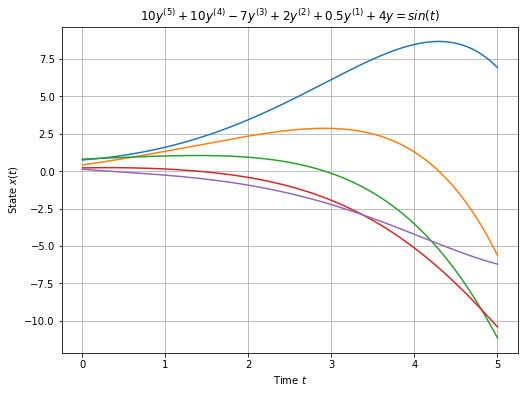

In [ ]:
# Simulation of the 1st equation (Task 2.1)

# x_dot from state space with constant U
def StateSpace(x, t, A, B, u):
  return A.dot(x) + B.dot(u(t))

# Constants
A = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [-0.4, -0.05, -0.2, 0.7, -1]])
B = np.array([0,
              0,
              0,
              0,
              0.1])
u=np.sin
n = len(A)

# Time domain
time = np.linspace(0, 5, 1000)
# Initial state
x0 = np.random.rand(n)

solution = odeint(StateSpace, x0, time, args=(A, B, u))
plot1(time, solution, 
      title_str='$10 y^{(5)}+10 y^{(4)}-7y^{(3)}+2 y^{(2)}+0.5 y^{(1)}+4y=sin(t)$')

## Subtask 2.3 Mass-spring-damper system

Find or derive equations for a mass-spring-damper system with mass 10kg, spting stiffness of 1000 N / m and damping coefficient 1 N s / m, write them in state-space and second order ODE forms, and simulate them.

**Solution:**

Given $m = 10,\ k = 1000,\ b = 1,\ g = 9.8$. The *ODE* that describes the system is $m \ddot x + b \dot x + k x = mg$. Substituting the coefficients given yields
$$
\ddot x + \dot x + 100 x = 9.8
$$
In *State Space represetation*:
$$\dot x = 
\begin{pmatrix} 0 & 1 \\
                -100 & -0.1
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ 9.8
\end{pmatrix}
$$

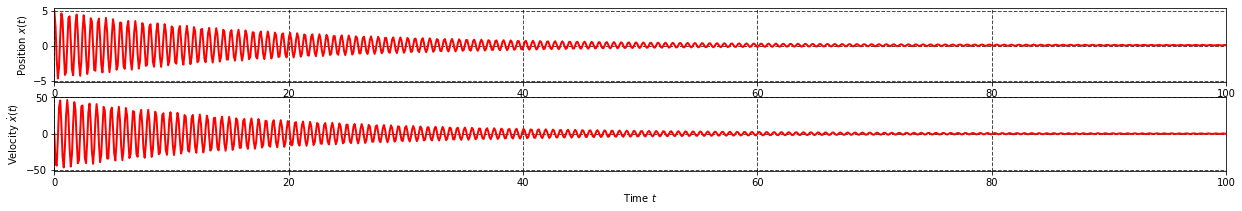

In [ ]:
# Constants
m = 10
k = 1000
b = 1
g = 9.8
A = np.array([[0, 1],
              [-k/m, -b/m]])
B = np.array([0,
              g])
n = len(B)
u = 1

# Initial state
x0 = np.array([5,
               0])

# Time domain
t0 = 0
tf = 100
time = np.linspace(t0, tf, 1000)

solution = odeint(dxdt, x0, time, args=(A, B, u))

# Plotting
rcParams['figure.figsize'] = 21, 3
subplot(2,1,1)
plot(time, solution[:, 0], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${x}(t)$')

subplot(2,1,2)
plot(time, solution[:,1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity ${\dot{x}(t)}$')

xlabel(r'Time $t$')
show()

# Task 3.1, Convert to transfer functions

$$
\begin{cases}
\ddot x + 0.5 \dot x + 4y = u \\
y = 1.5 \dot x + 6 x
\end{cases}
$$

**Solution:**
1. Taking the Laplace of both equations,
$$
\begin{cases}
s^2x(s) + 0.5s x(s) + 4y(s) = u(s) \\
y(s) = 1.5s x(s) + 6x(s)
\end{cases}
$$
2. Expressing $x$ and substituting to the 2nd equation yields
$$
\begin{cases}
x(s) = \frac{u(s) - 4y(s)}{s^2 + 0.5s} \\
y(s) = \frac{(1.5s + 6)(u(s) - 4y(s))}{s^2 + 0.5s}
\end{cases}
$$
3. Finally, we obtain *Transfer Function representation* by expressing $y(s)$,
$$
y(s) = \frac{1.5s + 6}{s^2 + 6.5s + 24}u(s),\ G(s) = \frac{y(s)}{u(s)} = \frac{1.5s + 6}{s^2 + 6.5s + 24}
$$
4. Or expressing expressing $x(s)$, 
$$
x(s) = \frac{1}{s^2 + 6.5s + 24}u(s),\ W(s) = \frac{x(s)}{u(s)} = \frac{1}{s^2 + 6.5s + 24}
$$

$$
\begin{cases}
10 \ddot x + 1.5 \dot x + 8y = 0.5u \\
y = 15 \dot x + 16 x
\end{cases}
$$

**Solution:**
$$
(20s^2 + 3s) x(s) = u(s) - 16y(s) \\
y(s) = (15s + 16)x(s)
$$
*Transfer Function representation,*
$$
y(s) = \frac{15s + 16}{20s^2 + 243s + 256}u(s),\ G(s) = \frac{y(s)}{u(s)} = \frac{15s + 16}{20s^2 + 243s + 256}
$$
$$
x(s) = \frac{1}{20s^2 + 243s + 256}u(s),\ W(s) = \frac{x(s)}{u(s)} = \frac{1}{20s^2 + 243s + 256}
$$

$$
\begin{cases}
\ddot x + 2 \dot x - 5y = u \\
y = 2.5 \dot x - 7 x
\end{cases}
$$

**Solution:**
$$
(s^2 + 2s)x(s) = u(s) + 5y(s) \\
y(s) = (2.5s - 7)x(s)
$$
*Transfer Function representation,*
$$
y(s) = \frac{2.5s - 7}{s^2 - 10.5s + 35}u(s),\ G(s) = \frac{y(s)}{u(s)} = \frac{2.5s - 7}{s^2 - 10.5s + 35}
$$
$$
x(s) = \frac{1}{s^2 - 10.5s + 35}u(s),\ W(s) = \frac{x(s)}{u(s)} = \frac{1}{s^2 - 10.5s + 35}
$$

$$
\begin{cases}
\ddot x + 22 \dot x + 10y = 10u \\
y = 10.5 \dot x + 11 x
\end{cases}
$$

**Solution:**
$$
(0.1s^2 + 2.2s)x(s) = u(s) - y(s) \\
y(s) = (10.5s + 11)x(s)
$$
*Transfer Function representation,*
$$
y(s) = \frac{10.5s + 11}{0.1s^2 + 12.7s + 11}u(s),\ W(s) = \frac{y(s)}{u(s)} = \frac{10.5s + 11}{0.1s^2 + 12.7s + 11}
$$
$$
x(s) = \frac{1}{0.1s^2 + 12.7s + 11}u(s),\ W(s) = \frac{x(s)}{u(s)} = \frac{1}{0.1s^2 + 12.7s + 11}
$$

# 4. Stability of an autonomous linear system

Autonomous linear system is *stable*, iff the eigenvalues of its matrix have negative real parts. In other words, their should lie on the left half of the complex plane.

Consider the system:

$$\dot x = 
\begin{pmatrix} -1 & 0.4 \\ -20 & -16
\end{pmatrix}
x
$$

Let us find its eigenvalues:

In [ ]:
from numpy.linalg import eig

A = np.array([[-1, 0.4], [-20, -16]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [ -1.55377801 -15.44622199]


The eigenvalues are $\lambda_1 = -1.55$ and $\lambda_1 = -15.44$, both real and negative. Let us test those and show that the system's state converges:

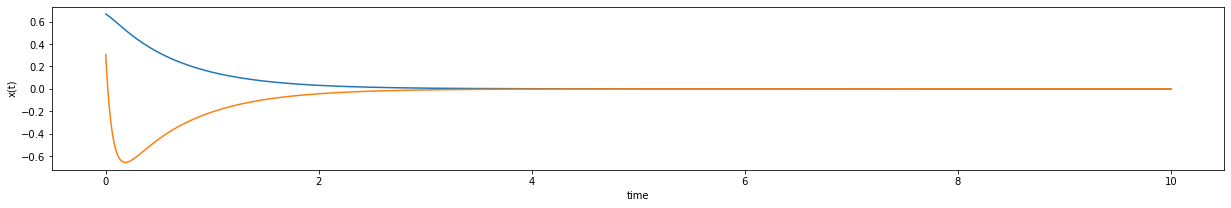

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def LTI(x, t):
    return A.dot(x)

time = np.linspace(0, 10, 1000)    # interval from 0 to 10
x0 = np.random.rand(2)            # initial state

solution = odeint(LTI, x0, time)

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

## Task 4.1. Find if the following autonomous linear systems are stable
## Task 4.2 Simulate all of them, to show convergence.

*Remark: please run each code snippet sequentially for each task*

$$\dot x = 
\begin{pmatrix} 1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$

**Solution:**

1. Let $A = \begin{pmatrix} 1 & 0 \\ -5 & -10
\end{pmatrix} $, then eigenvalues can be found from $det(A - \lambda I) = 0$:
$$
\begin{vmatrix} 1 - \lambda & 0 \\ -5 & -10 - \lambda
\end{vmatrix} = \lambda^2 +9\lambda -10 = 0
$$
2. Solving the quadratic equation yields
$$
\begin{cases}
\lambda_1 = -10 \\
\lambda_2 = 1
\end{cases}
$$

The same can be done using Python with `numpy` library:

In [ ]:
# State matrix
A = np.array([[1, 0],
              [-5, -10]])
e, _ = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-10.   1.]


The eigenvalues are $\lambda_1 = -10$ and $\lambda_2 = 1$, both real, but one negative and other positive. So, the system is unstable. The following simulation proves it:

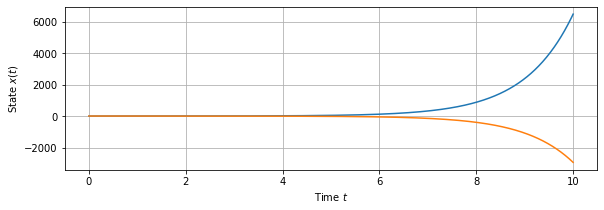

In [ ]:
B = np.array([0,
              0])
u = 1
n = len(B)

# Time domain
time = np.linspace(0, 10, 1000)

# Initial state
x0 = np.random.rand(n)

solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution)

$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 1 & 3
\end{pmatrix}
x
$$

In [ ]:
# State matrix
A = np.array([[0, 8],
              [1, 3]])
e, _ = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-1.70156212  4.70156212]


The eigenvalues are $\lambda_1 ≈ -1.70$ and $\lambda_2 ≈ 4.70$, both real, but one negative and other positive. So, the system is unstable. The following simulation proves it:

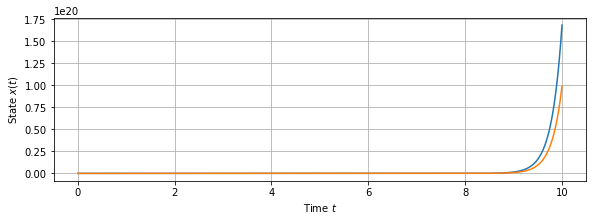

In [ ]:
B = np.array([0,
              0])
u = 1
n = len(B)

# Time domain
time = np.linspace(0, 10, 1000)

# Initial state
x0 = np.random.rand(n)

solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution)


$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 6 & 0
\end{pmatrix}
x
$$

In [ ]:
# State matrix
A = np.array([[0, 8],
              [6, 0]])
e, _ = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [ 6.92820323 -6.92820323]


The eigenvalues are $\lambda_1 ≈ -6.93$ and $\lambda_2 ≈ 6.93$, both real, but one negative and other positive. So, the system is unstable. The following simulation proves it:

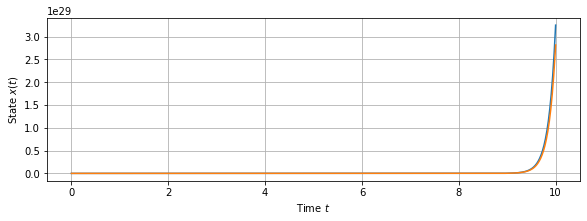

In [ ]:
B = np.array([0,
              0])
u = 1
n = len(B)

# Time domain
time = np.linspace(0, 10, 1000)

# Initial state
x0 = np.random.rand(n)

solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution)

$$\dot x = 
\begin{pmatrix} 0 & 1 \\ 6 & 3
\end{pmatrix}
x
$$

In [ ]:
# State matrix
A = np.array([[0, 1],
              [6, 3]])
e, _ = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-1.37228132  4.37228132]


The eigenvalues are $\lambda_1 ≈ -1.37$ and $\lambda_2 ≈ 4.37$, both real, but one negative and other positive. So, the system is unstable. The following simulation proves it:

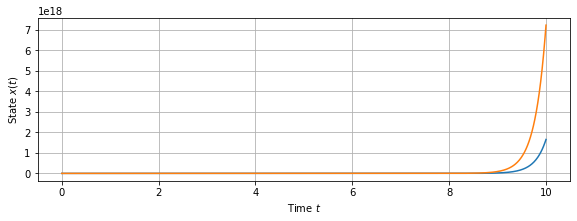

In [ ]:
B = np.array([0,
              0])
u = 1
n = len(B)

# Time domain
time = np.linspace(0, 10, 1000)

# Initial state
x0 = np.random.rand(n)

solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution)

## Task 4.3 Add a constant term to the equation and show via simulation how the point where the system converges changes (two examples are sufficient).

### For example, let's take mass-spring-damper system
The *ODE* that describes the system is $m \ddot x + b \dot x + k x = mg$.
In *State Space representation* it is following:
$$\dot x = 
\begin{pmatrix} 0 & 1 \\
                -\frac{k}{m} & -\frac{b}{m}
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ \frac{g}{m}
\end{pmatrix}
$$

Let $k = 400,\ b = 7,\ g = 9.8$. In this system we already have constant term, so let's change the mass ($m$) to observe different points of convergence.

In [ ]:
# Constants
k = 400
b = 7
g = 9.8
n = 2
u = 1
# Initial state
x0 = np.array([10,
               0])

1. For $ m = 70.6\ kg $, average male weight in Russia ([source](https://en.wikipedia.org/wiki/Human_body_weight)):
$$\dot x = 
\begin{pmatrix} 0 & 1 \\
                -\frac{1000}{19} & -\frac{35}{38}
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ \frac{49}{38}
\end{pmatrix}
$$

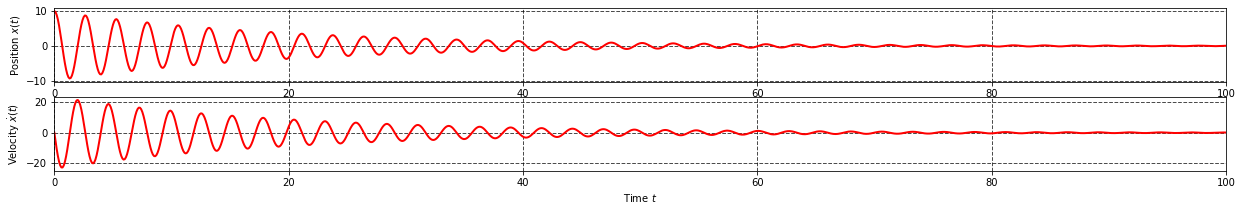

In [ ]:
m = 70.6
A = np.array([[0, 1],
              [-k/m, -b/m]])
B = np.array([0,
              g/m])

t0 = 0
tf = 100
time = np.linspace(t0, tf, 1000)
solution = odeint(dxdt, x0, time, args=(A, B, u))

# Plotting
rcParams['figure.figsize'] = 21, 3
subplot(2,1,1)
plot(time, solution[:, 0], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${x}(t)$')

subplot(2,1,2)
plot(time, solution[:,1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity ${\dot{x}(t)}$')

xlabel(r'Time $t$')
show()

2. For $ m = 15.5\ kg$, average racoon weight ([source](https://en.wikipedia.org/wiki/Raccoon)):
$$\dot x = 
\begin{pmatrix} 0 & 1 \\
                -\frac{800}{31} & -\frac{14}{31}
\end{pmatrix}
x
+ \begin{pmatrix} 0 \\ \frac{98}{155}
\end{pmatrix}
$$

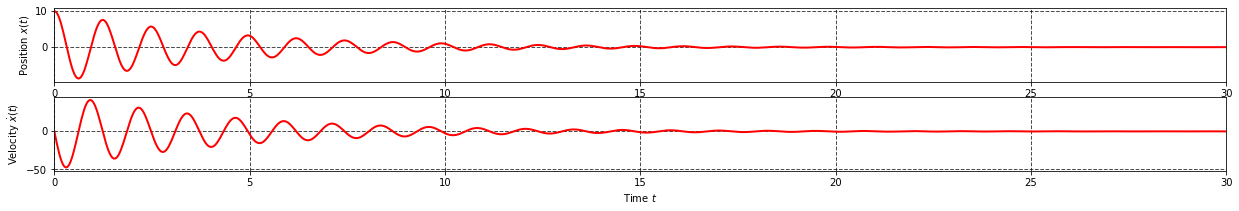

In [ ]:
m = 15.5
A = np.array([[0, 1],
              [-k/m, -b/m]])
B = np.array([0,
              g/m])
# Time domain
t0 = 0
tf = 30
time = np.linspace(t0, tf, 1000)
solution = odeint(dxdt, x0, time, args=(A, B, u))

# Plotting
rcParams['figure.figsize'] = 21, 3
subplot(2,1,1)
plot(time, solution[:, 0], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${x}(t)$')

subplot(2,1,2)
plot(time, solution[:, 1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity ${\dot{x}(t)}$')

xlabel(r'Time $t$')
show()

So, we can observe that the first system (with the average human body weight) stabilized after about $60$ seconds, while the second system (with the average racoon body weight) become stable after about $20$ seconds.

Therefore, *the average racoon is three times more stable than the average human*.

---

### Another example of random but stable autonomous system
Its *State Space representation* is the following:
$$\dot x = 
\begin{pmatrix} -14 & 7 \\ 28 & -35
\end{pmatrix}
x
$$
So let's add the constant term to observe different points of convergence.

In [ ]:
# Constants
n = 2
u = 1
A = np.array([[-14, 7],
             [28, -35]])
e, _ = eig(A)
print(e)
# Initial state
x0 = np.array([5,
               0])

[ -7. -42.]


1. Let's simulate with the constant term such as its values will be the eigenvalues, $B = \begin{pmatrix} -7 \\ -42 \end{pmatrix}$:

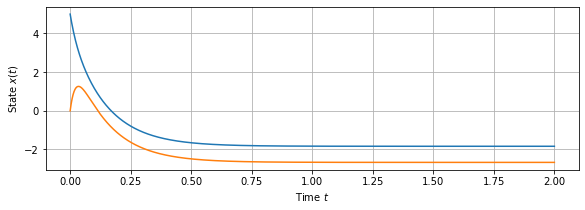

In [ ]:
B = np.array([-7,
              -42])
time = np.linspace(0, 2, 1000)
solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution)

We see that the system converges at about $x = -2$ and $x = -3$ points respectively.

2. Let's swap the values of the contant term, $B = \begin{pmatrix} -42 \\ -7 \end{pmatrix}$:

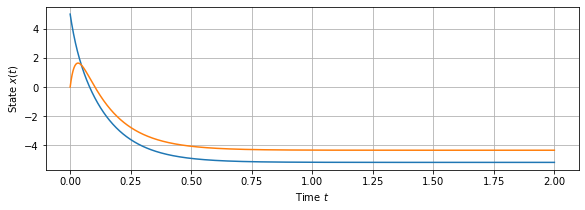

In [ ]:
B = np.array([-42,
              -7])
time = np.linspace(0, 2, 1000)
solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution)

Now we see that the situation a bit changes. The system converges at about $x = -5$ and $x = -4$ points respectively.

Therefore, such comparison shows that the lower constant term for position equation the lower will be its point of convergence. It is important to note that there are no changes in time if we are talking about convergence point.

### Interesting example (of harmonic motion) that I found during research for stable systems

Double Spring Mass system ([source](https://gereshes.com/2019/01/07/double-spring-mass-systems-matlabs-ode-45/))

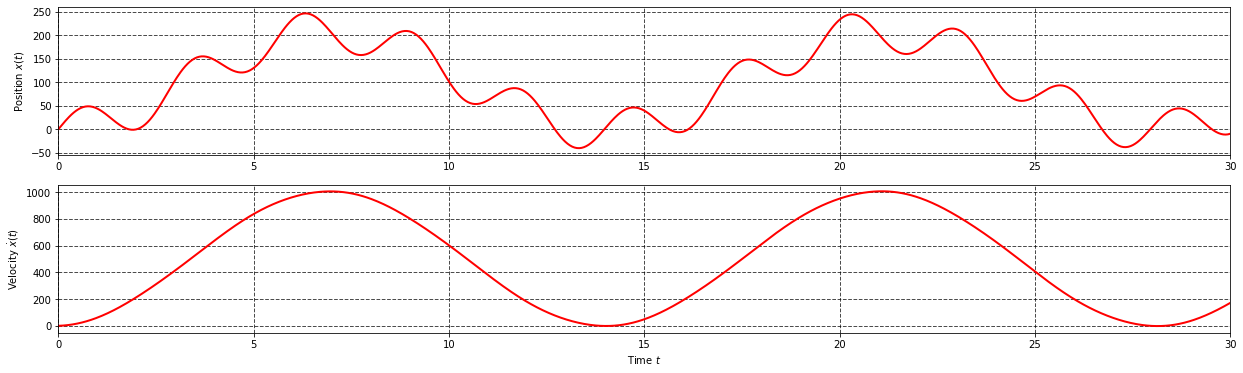

In [ ]:
# Constants
k1 = 400
k2 = 100
m1 = 100
m2 = 400
# Time domain
t0 = 0
tf = 30
time = np.linspace(t0, tf, 1000)
# Initial state
x0 = np.array([0,
               0, 
               100,
               10])
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [(-k1-k2)/m1, k2/m1, 0, 0],
              [k2/m2, -k2/m2, 0, 0]])
B = np.array([0,
              0,
              10,
              100])
solution = odeint(dxdt, x0, time, args=(A, B, u))

# Plotting
rcParams['figure.figsize'] = 21, 6
subplot(2,1,1)
plot(time, solution[:, 0], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${x}(t)$')

subplot(2,1,2)
plot(time, solution[:,1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity ${\dot{x}(t)}$')

xlabel(r'Time $t$')
show()

### The example from 4.2, where the every given system diverges

Let's consider and simulate the following system:
$$\dot x = 
\begin{pmatrix} 1 & 0 \\ -5 & -10
\end{pmatrix}
x
+
\begin{pmatrix} -1000 \\ 10000
\end{pmatrix}
$$

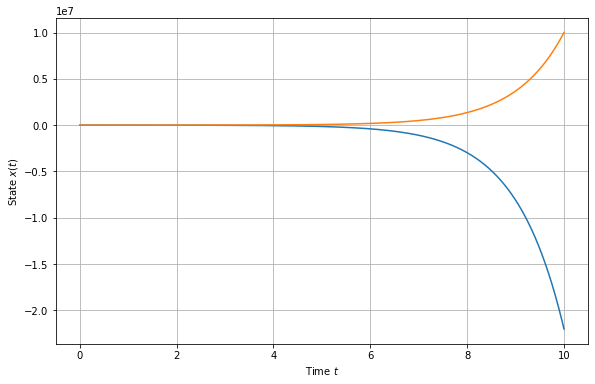

In [ ]:
# Constants
A = np.array([[1, 0],
              [-5, -10]])  # state matrix
B = np.array([-1000,
              10000])  # input matrix
u = 1
n = len(B)

# Time domain
t0 = 0          # Initial time
tf = 10         # Final time
t_steps = 1000  # Time segments
time = np.linspace(t0, tf, t_steps)
# Initial state
x0 = np.random.rand(n)

solution = odeint(dxdt, x0, time, args=(A, B, u))
plot1(time, solution)

Since the system is initially unstable (diverges), I show how it's directions of divergence change inversely. I did it by trying different constant terms.